In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# seed값 설정
seed = 0

np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28*28).astype("float32") / 255.0
X_test = X_test.reshape(X_test.shape[0], 28*28).astype("float32") / 255.0

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [6]:
# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim = 28*28, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [7]:
# 모델 실행 환경 설정
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [8]:
# 모델 최적화 설정
MODEL_DIR = "./model/"
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

In [9]:
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath= modelpath, monitor = "val_loss", verbose = 1,
                               save_weights_only = True)

In [10]:
early_stopping_callback = EarlyStopping(monitor = "val_loss", patience = 10)

In [11]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data= (X_test, Y_test), epochs=30, batch_size = 200, verbose = 0, callbacks = [early_stopping_callback, checkpointer])


Epoch 00001: saving model to ./model/01-0.1548.hdf5

Epoch 00002: saving model to ./model/02-0.1046.hdf5

Epoch 00003: saving model to ./model/03-0.0845.hdf5

Epoch 00004: saving model to ./model/04-0.0799.hdf5

Epoch 00005: saving model to ./model/05-0.0685.hdf5

Epoch 00006: saving model to ./model/06-0.0632.hdf5

Epoch 00007: saving model to ./model/07-0.0712.hdf5

Epoch 00008: saving model to ./model/08-0.0618.hdf5

Epoch 00009: saving model to ./model/09-0.0586.hdf5

Epoch 00010: saving model to ./model/10-0.0663.hdf5

Epoch 00011: saving model to ./model/11-0.0707.hdf5

Epoch 00012: saving model to ./model/12-0.0630.hdf5

Epoch 00013: saving model to ./model/13-0.0628.hdf5

Epoch 00014: saving model to ./model/14-0.0662.hdf5

Epoch 00015: saving model to ./model/15-0.0669.hdf5

Epoch 00016: saving model to ./model/16-0.0668.hdf5

Epoch 00017: saving model to ./model/17-0.1042.hdf5

Epoch 00018: saving model to ./model/18-0.0760.hdf5

Epoch 00019: saving model to ./model/19-0.069

In [12]:
#테스트 정확도 출력
print("\n Test Accuracy : %.4f"%(model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 1s 70us/step

 Test Accuracy : 0.9819


In [13]:
# 테스트셋의 오차
y_vloss = history.history["val_loss"]

In [14]:
# 학습셋의 오차
y_loss = history.history["loss"]

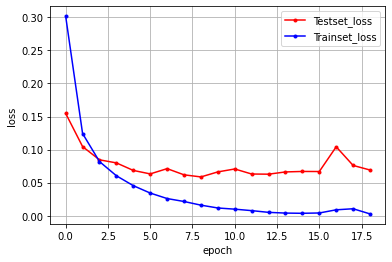

In [15]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = ".", c = "red", label = "Testset_loss")
plt.plot(x_len, y_loss, marker = ".", c = "blue", label = "Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = "upper right")
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()